<a href="https://colab.research.google.com/github/GUC-DM/w24-mini-project-2-farah-ahmed-t10-malak-amgad-t10/blob/main/Classification_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Mini-Project

## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [34]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn-v0_8")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/main/data/telecom_churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

In [37]:
df.isnull().sum()

,0
customerID,56
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [38]:
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transf

In [39]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

customerID: Number of unique values 6976
gender: Number of unique values 2
SeniorCitizen: Number of unique values 2
Partner: Number of unique values 2
Dependents: Number of unique values 2
tenure: Number of unique values 72
PhoneService: Number of unique values 2
MultipleLines: Number of unique values 3
InternetService: Number of unique values 3
OnlineSecurity: Number of unique values 3
OnlineBackup: Number of unique values 3
DeviceProtection: Number of unique values 3
TechSupport: Number of unique values 3
StreamingTV: Number of unique values 3
StreamingMovies: Number of unique values 3
Contract: Number of unique values 3
PaperlessBilling: Number of unique values 2
PaymentMethod: Number of unique values 4
MonthlyCharges: Number of unique values 1584
TotalCharges: Number of unique values 5783
Churn: Number of unique values 2


encode the binary columns into its numerical equivalent for use in the plots and correlation matrix

In [40]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


In [41]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : ['$29.85/m' '$56.95/m' '$53.85/m' ... '$63.1/m' '$44.2/m' '$78.7/m']
TotalCharges : ['$29.85' '$1889.5' '$108.15' ... '$346.45' '$306.6' '$6844.5']
Churn : ['No' 'Yes']


## Data Cleaning

In [42]:
df = df.drop(columns=['customerID'])

In [43]:
# Remove the dollar sign and '/m', then convert to float
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('$', '').str.replace('/m', '').astype(float)

# Rename the column
df.rename(columns={'MonthlyCharges': 'MonthlyCharges($)'}, inplace=True)

# Check the transformed column
print(df['MonthlyCharges($)'].head())

0    29.85
1    56.95
2    53.85
3    42.30
4    70.70
Name: MonthlyCharges($), dtype: float64


In [44]:
# Remove the dollar sign and convert to float
df['TotalCharges'] = df['TotalCharges'].str.replace('$', '').astype(float)

# Rename the column
df.rename(columns={'TotalCharges': 'TotalCharges($)'}, inplace=True)

# Check the transformed column
print(df['TotalCharges($)'].head())


0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges($), dtype: float64


In [45]:
# Specify the relevant columns for grouping (you can add more columns as needed)
grouping_columns = ['PhoneService', 'InternetService']

# Group by these columns and calculate the mean of 'TotalCharges'
group_means = df.groupby(grouping_columns)['TotalCharges($)'].mean()

# Function to replace missing values in 'TotalCharges' based on group mean
def fill_missing_totalcharges(row):
    if pd.isnull(row['TotalCharges($)']):
        group_values = tuple(row[grouping_columns])
        return group_means.get(group_values, row['TotalCharges($)'])  # Default to original value if no group mean found
    return row['TotalCharges($)']

# Apply the function to fill missing values in 'TotalCharges'
df['TotalCharges($)'] = df.apply(fill_missing_totalcharges, axis=1)

# Verify if missing values are replaced
print(df['TotalCharges($)'].isnull().sum())


0


In [46]:
df['Contract'] = pd.Categorical(df['Contract'],
                                      categories=['Month-to-month', 'One year', 'Two year'],
                                      ordered=True)
df['Contract']

,Contract
0,Month-to-month
1,One year
2,Month-to-month
3,One year
4,Month-to-month
...,...
7027,One year
7028,One year
7029,Month-to-month
7030,Month-to-month


In [47]:
df[df['Contract'] <= 'Month-to-month']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges($),TotalCharges($),Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150000,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.650000,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.500000,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.400000,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,Male,0,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.250000,No
7023,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,3205.284789,Yes
7024,Male,0,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.100000,No
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.450000,No


In [48]:
categorical_features = categorical_col.copy()

In [49]:
df['Churn'] = df['Churn'].astype('category').cat.codes
df['Churn']

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7027,0
7028,0
7029,0
7030,1


## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

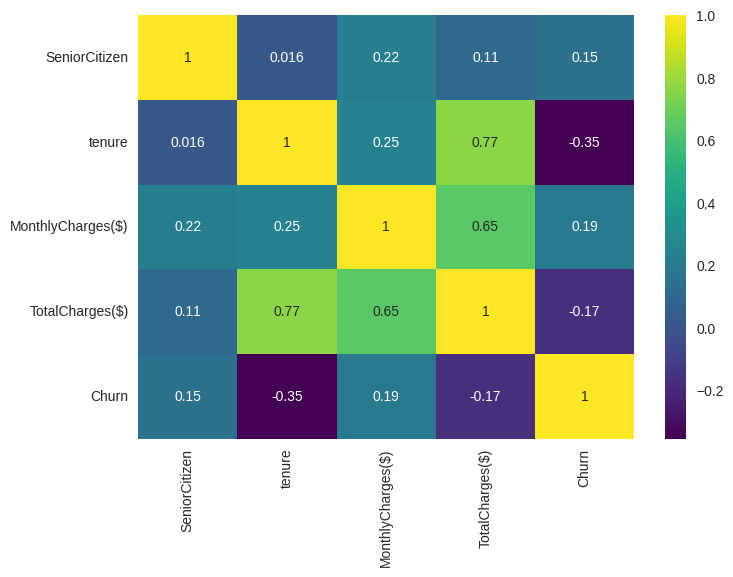

In [51]:
corr = df.corr(numeric_only=True)
corr
corr['Churn'].sort_values(ascending=False, key=lambda x: x.abs())
sns.heatmap(corr, cmap='viridis', annot = True);

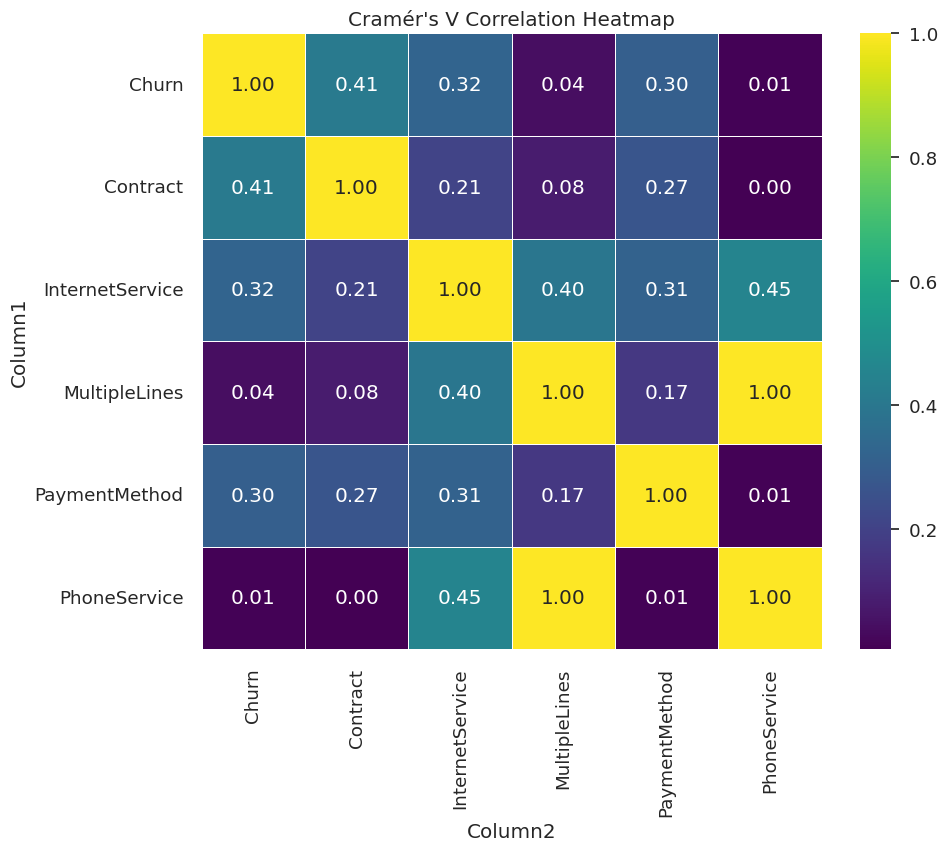

In [66]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# from scipy.stats import chi2_contingency

# # Function to compute Cramér's V
# def cramers_v(confusion_matrix):
#     chi2 = chi2_contingency(confusion_matrix)[0]  # Chi-square statistic
#     n = confusion_matrix.values.sum()  # Total number of observations
#     r, k = confusion_matrix.shape  # Number of rows and columns
#     return np.sqrt(chi2 / (n * (min(k-1, r-1))))  # Cramér's V calculation

# # List of categorical columns to calculate correlations for
# categorical_columns = ['Churn', 'InternetService', 'PhoneService', 'Contract', 'PaymentMethod', 'MultipleLines']

# # Initialize an empty DataFrame with categorical columns as index and columns
# cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# # Calculate Cramér's V for each pair of columns
# for col1 in categorical_columns:
#     for col2 in categorical_columns:
#         if col1 == col2:
#             cramers_v_matrix.loc[col1, col2] = 1.0  # Same column correlation is 1
#         else:
#             confusion_matrix = pd.crosstab(df[col1], df[col2])
#             cramers_v_matrix.loc[col1, col2] = cramers_v(confusion_matrix)

# # Convert values to float for plotting
# cramers_v_matrix = cramers_v_matrix.astype(float)

# # Plot the heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(cramers_v_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
# plt.title("Cramér's V Correlation Heatmap")
# plt.show()


import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Function to compute Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]  # Chi-square statistic
    n = confusion_matrix.values.sum()  # Total number of observations
    r, k = confusion_matrix.shape  # Number of rows and columns
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))  # Cramér's V calculation

# List of categorical columns to calculate correlations for
categorical_columns = ['Churn', 'InternetService', 'PhoneService', 'Contract', 'PaymentMethod', 'MultipleLines']

# Store Cramér's V values in a dictionary
cramers_v_dict = {}

for i, col1 in enumerate(categorical_columns):
    for col2 in categorical_columns[i:]:  # Avoid duplicate pairs
        if col1 == col2:
            cramers_v_dict[(col1, col2)] = 1.0
        else:
            confusion_matrix = pd.crosstab(df[col1], df[col2])
            cramers_v_dict[(col1, col2)] = cramers_v(confusion_matrix)
            cramers_v_dict[(col2, col1)] = cramers_v(confusion_matrix)  # Symmetric value

# Convert dictionary to DataFrame
cramers_v_matrix = pd.DataFrame.from_dict(cramers_v_dict, orient='index', columns=['CramersV']).reset_index()
cramers_v_matrix[['Column1', 'Column2']] = pd.DataFrame(cramers_v_matrix['index'].tolist(), index=cramers_v_matrix.index)
cramers_v_matrix.drop(columns='index', inplace=True)
cramers_v_pivot = cramers_v_matrix.pivot(index='Column1', columns='Column2', values='CramersV')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_pivot, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
plt.title("Cramér's V Correlation Heatmap")
plt.show()




**Answer for Q1**: Your answer here

**Q2: Which payment method has the highest churn rate?**

**Visualization**

<ipython-input-53-75348d49eeec>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


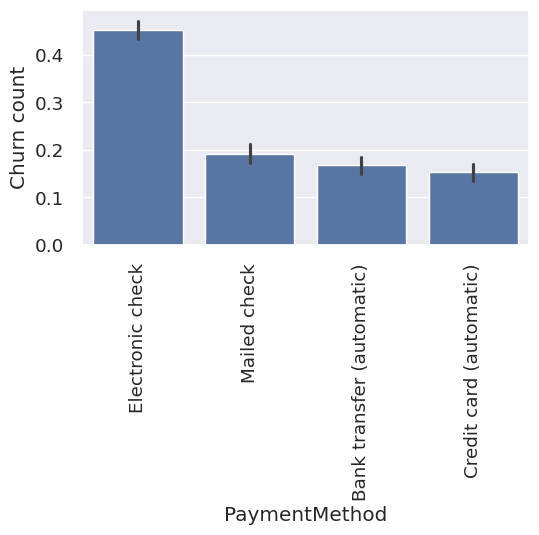

In [53]:
import math

# Define the number of rows and columns dynamically
num_features = len(categorical_features)
num_cols = 3  # You can set a fixed number of columns
num_rows = math.ceil(num_features / num_cols)  # Calculate the required number of rows

# Create the plot
sns.set(font_scale=1.2)
plt.figure(figsize=(num_cols * 5, num_rows * 5))  # Adjust figure size based on grid

column= 'PaymentMethod'
plt.subplot(num_rows, num_cols, 1)  # Adjust grid dimensions dynamically
g = sns.barplot(x=column, y='Churn', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.ylabel('Churn count')
plt.xlabel(f'{column}')

plt.tight_layout()  # To prevent overlap between plots
plt.show()


**Answer for Q2**: Your answer here

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

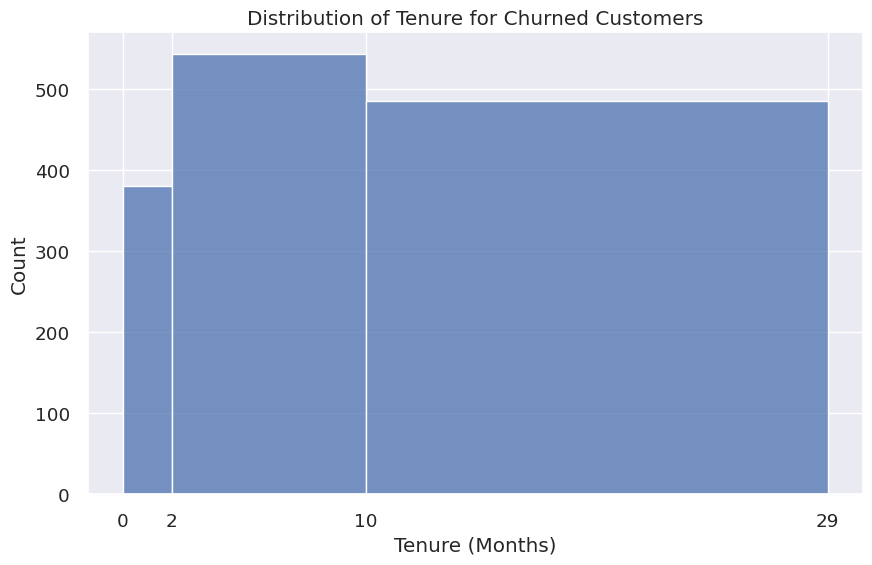

In [70]:
churned_customers = df[df['Churn'] == 1]

# Calculate the quartiles of tenure for churned customers
tenure_quartiles = churned_customers['tenure'].quantile([0.25, 0.5, 0.75])

# Create bins based on quartiles
bins = [0] + tenure_quartiles.tolist()

# Create a histogram with the specified bins
plt.figure(figsize=(10, 6))
sns.histplot(churned_customers['tenure'], bins=bins, kde=False)
plt.title('Distribution of Tenure for Churned Customers')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.xticks(bins)
plt.show()

In [72]:
# Print the quantiles
print("25th percentile:", tenure_quartiles[0.25])
print("50th percentile (median):", tenure_quartiles[0.5])
print("75th percentile:", tenure_quartiles[0.75])

25th percentile: 2.0
50th percentile (median): 10.0
75th percentile: 29.0


**Answer for Q3**: Your answer here

## Data Preparation for Modelling

In [54]:
df_encoded = df.copy()

In [55]:
df_encoded['Contract'] = df_encoded['Contract'].cat.codes
df_encoded['Contract']

,Contract
0,0
1,1
2,0
3,1
4,0
...,...
7027,1
7028,1
7029,0
7030,0


In [56]:
categorical_features.remove('Contract')

In [57]:
# Identify all categorical columns (those of type 'object' and/or explicitly defined as categorical)
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Apply one-hot encoding to all identified categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_features,dtype='int8')



# Check the structure of the encoded DataFrame
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges($)                        7032 non-null   float64
 3   TotalCharges($)                          7032 non-null   float64
 4   Churn                                    7032 non-null   int8   
 5   gender_Female                            7032 non-null   int8   
 6   gender_Male                              7032 non-null   int8   
 7   Partner_No                               7032 non-null   int8   
 8   Partner_Yes                              7032 non-null   int8   
 9   Dependents_No                            7032 non-null   int8   
 10  Dependents_Yes                           7032 no

In [59]:
df_encoded= df_encoded.drop(columns=['gender_Male','Partner_No','Dependents_No','PaperlessBilling_No','PhoneService_No'])

In [ ]:
df_encoded.info()

## Modelling

### Tree Visualization

## Evaluation

## Bonus (Optional)